In [60]:
# 텐서플로우 import
import tensorflow as tf

# 1.유틸리티

## 1.1.Matplotlib 커스텀 폰트(한글)

In [61]:
import matplotlib as mpl

def mpl_font_for_korean():
    """Matplot Lib에서 한글을 출력하기 위한 설정
    """
    !wget https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf

    mpl.font_manager.fontManager.addfont('NanumGothic-Regular.ttf')
    mpl.rc('font', family='NanumGothic')

In [62]:
mpl_font_for_korean()

--2023-04-25 11:14:16--  https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/main/ofl/nanumgothic/NanumGothic-Regular.ttf [following]
--2023-04-25 11:14:17--  https://raw.githubusercontent.com/google/fonts/main/ofl/nanumgothic/NanumGothic-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2054744 (2.0M) [application/octet-stream]
Saving to: ‘NanumGothic-Regular.ttf.1’

NanumGothic-Regular 100%[===================>]   1.96M  --.-KB/s    in 0.01s   

2023-04-25 11:14:17 (202 MB/s) - ‘NanumGothic-Regu

# 2.데이터 세트

## 2.1.Fashion MNIST

In [63]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [64]:
print(f"{train_images.shape}")
print(f"{train_labels.shape}")
print(f"{test_images.shape}")
print(f"{test_labels.shape}")

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [65]:
class_names = ['티셔츠/상의', 
               '바지', 
               '스웨터', 
               '드레스', 
               '코트',
               '샌들', 
               '셔츠', 
               '운동화', 
               '가방', 
               '앵클부츠'
               ]

### 이미지

In [66]:
import matplotlib.pyplot as plt
import numpy as np

In [67]:
def plot_gray_image(image):
  """ 흑백 이미지 플롯
  
  Parameters
  ----------
  image : np.ndarray
      (image_width, image_height)의 이미지
  
  """
  plt.figure()
  plt.imshow(
      image,
      cmap=plt.cm.binary.reversed()
  )
  plt.colorbar()
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.show()


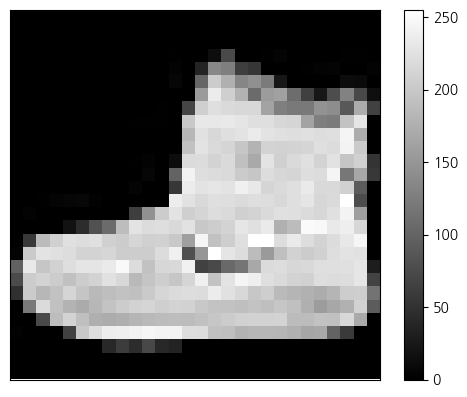

In [68]:
plot_gray_image(train_images[0])

### 라벨

In [69]:
train_labels[0]

9

In [70]:
class_names[train_labels[0]]

'앵클부츠'

### 한꺼번에 보기

In [71]:
def plot_multiple_images(images, labels, class_names):
  """ 여러 이미지 및 라벨 플롯
  """

  plt.figure(figsize=(10, 10))
  for i in range(25):
      # 이미지
      plt.subplot(5, 5, i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(
          images[i],
          cmap=plt.cm.binary.reversed()
      )
      # 라벨
      plt.xlabel(f"{class_names[labels[i]]} ({labels[i]})")
  plt.show()

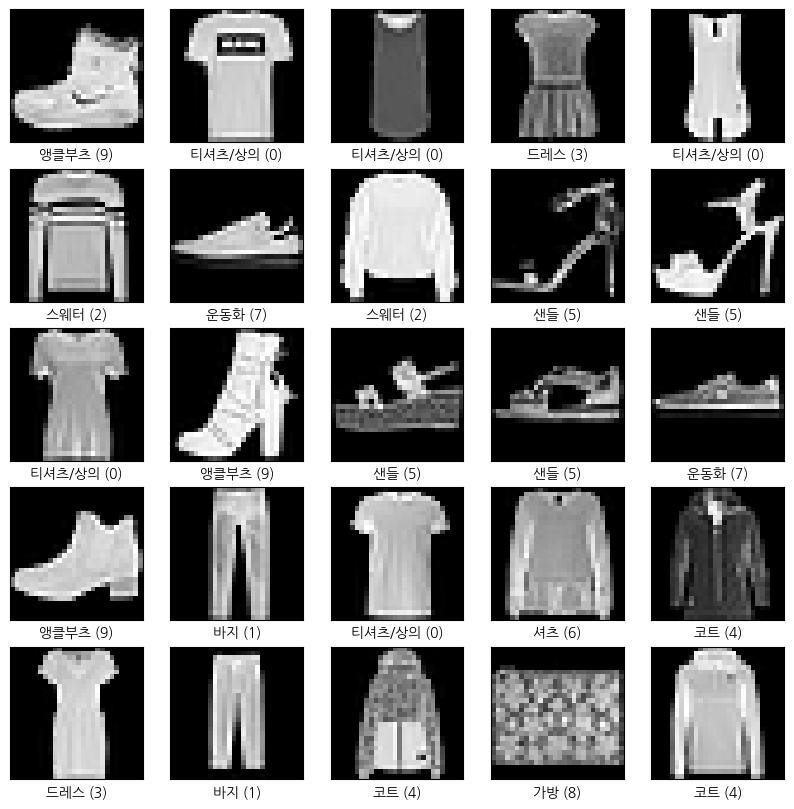

In [72]:
plot_multiple_images(train_images, train_labels, class_names)

## 2.2.전처리

In [73]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# 3.간단한 분류기

## 3.1모델1

### 모델

In [74]:
layers = tf.keras.layers
models = tf.keras.models

In [75]:
def mnist_model(image_size = (28,28)):
  input_1 = layers.Input(image_size)
  flatten_1 = layers.Flatten()(input_1)
  dense_1 = layers.Dense(10,activation="softmax")(flatten_1)

  return models.Model(inputs=[input_1],outputs=[dense_1])

In [76]:
model_1 = mnist_model()

In [77]:
model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 트레이닝

In [78]:
history_1 = model_1.fit(
    train_images,
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6056 - accuracy: 0.7964
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4618 - accuracy: 0.8428
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4359 - accuracy: 0.8501
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4225 - accuracy: 0.8547
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4130 - accuracy: 0.8573
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4078 - accuracy: 0.8586
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4025 - accuracy: 0.8606
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3983 - accuracy: 0.8618
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3953 - accuracy: 0.8617
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.393

### 테스트

In [79]:
model_1.evaluate(
    test_images,
    test_labels
)

313/313 [==============================] - 1s 2ms/step - loss: 0.4620 - accuracy: 0.8419


[0.4619535505771637, 0.8418999910354614]

## 3.2.모델2

### 모델

In [80]:
def mnist_model2(image_size = (28,28)):
  input_1 = layers.Input(image_size)
  flatten_1 = layers.Flatten()(input_1)
  dense_1 = layers.Dense(128,)(flatten_1)
  dense_2 = layers.Dense(10,activation="softmax")(dense_1)

  return models.Model(inputs=[input_1],outputs=[dense_2])

In [81]:
model_2 = mnist_model2()

In [82]:
model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 트레이닝

In [84]:
history_2 = model_2.fit(
    train_images,
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5395 - accuracy: 0.8138
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4569 - accuracy: 0.8399
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4427 - accuracy: 0.8454
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4292 - accuracy: 0.8508
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4261 - accuracy: 0.8500
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4181 - accuracy: 0.8529
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4136 - accuracy: 0.8541
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4130 - accuracy: 0.8555
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4055 - accuracy: 0.8576
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.406

### 테스트

In [85]:
model_2.evaluate(
    test_images,
    test_labels
)

313/313 [==============================] - 1s 2ms/step - loss: 0.4670 - accuracy: 0.8353


[0.4670215845108032, 0.8353000283241272]

## 3.3.모델 2-1

In [86]:
def mnist_model2_1(image_size = (28,28)):
  input_1 = layers.Input(image_size)
  flatten_1 = layers.Flatten()(input_1)
  dense_1 = layers.Dense(128,)(flatten_1)
  # dense_1 = layers.Dense(128, activation="relu")(flatten_1) 이것도 가능
  relu_1 = layers.ReLU()(dense_1)
  dense_2 = layers.Dense(10,activation="softmax")(relu_1)

  return models.Model(inputs=[input_1],outputs=[dense_2])

In [87]:
model_2_1 = mnist_model2_1()

In [88]:
model_2_1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 re_lu_1 (ReLU)              (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [89]:
model_2_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 트레이닝

In [90]:
history_2_1 = model_2_1.fit(
    train_images,
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4955 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3748 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3396 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3121 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2953 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2795 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2682 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2570 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2485 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

### 테스트

In [91]:
model_2_1.evaluate(
    test_images,
    test_labels
)

313/313 [==============================] - 1s 3ms/step - loss: 0.3325 - accuracy: 0.8832


[0.3324810862541199, 0.8831999897956848]

# 4.결과 정리

## 4.1.보조 함수

In [92]:
import numpy as np

### 이미지 및 클래스 별 확률 표시

틀린 이미지

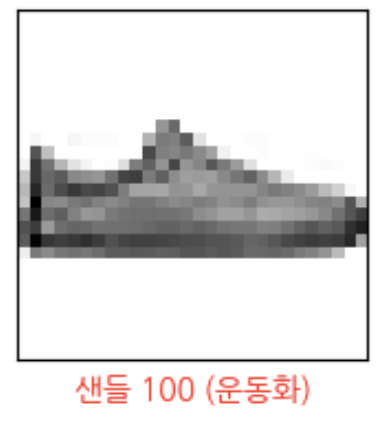

맞는 이미지

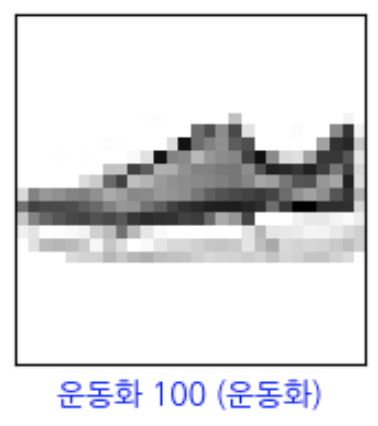

In [93]:
def plot_image(
    predictions_array: np.ndarray, 
    true_label: np.uint8, 
    img: np.ndarray):
    """이미지 및 클래스 별 확률 표시
    
    Parameters
    ----------
    predictions_array : numpy.ndarray
        (n+1, ) 차원의 배열
    true_label : numpy.uint8
        라벨 숫자. n이하여야 한다.
    img : numpy.ndarray
        이미지. 
    """
    # 축 설정
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # 이미지 표시
    plt.imshow(
        img,
        cmap=plt.cm.binary
    )

    # 이미지 라벨
    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel(
        f"{class_name[predicted_label]}" +
        f"{100*np.max(predicted_array):2.0f}" +
        f"({class_name[true_label]})",
        color=color)

### 값에 해당하는 확률 표시

틀린 확률

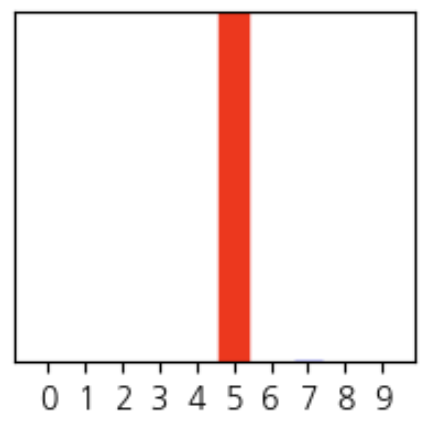

맞은 확률

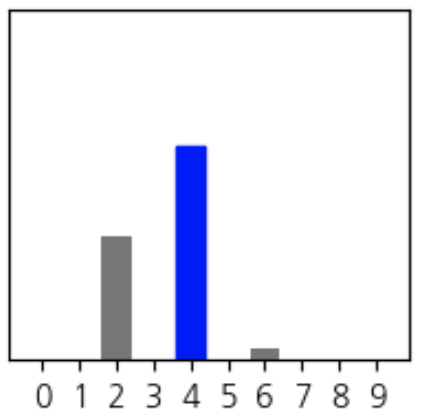

In [94]:
def plot_value_array(
    predictions_array: np.ndarray, 
    true_label: np.uint8):
    """값에 해당하는 확률 표시

    Parameters
    ----------
    predictions_array : numpy.ndarray
        (n+1, ) 차원의 배열
    true_label : numpy.uint8
        라벨 숫자. n이하여야 한다.
    """
    number_of_labels = predictions_array.shape[0]
    # 축 설정
    plt.grid(False)
    plt.xticks(range(number_of_labels))
    plt.yticks([])
    plt.ylim([0, 1]) ## y축을 0~1사이만만

    # 확률 값 plot
    thisplot = plt.bar(range(number_of_labels), predictions_array, color="#777777")
    predicted_label = np.argmax(predictions_array)

    # 색상 설정
    # 답을 맞게 예측했으면 파랑, 틀리게 예측했으면 빨강
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### 이미지 / 확률 한꺼번에 표시

예시 이미지. 실제로는 기본 줄 5, 칸 3에 해당하는 이미지가 플롯됩니다.

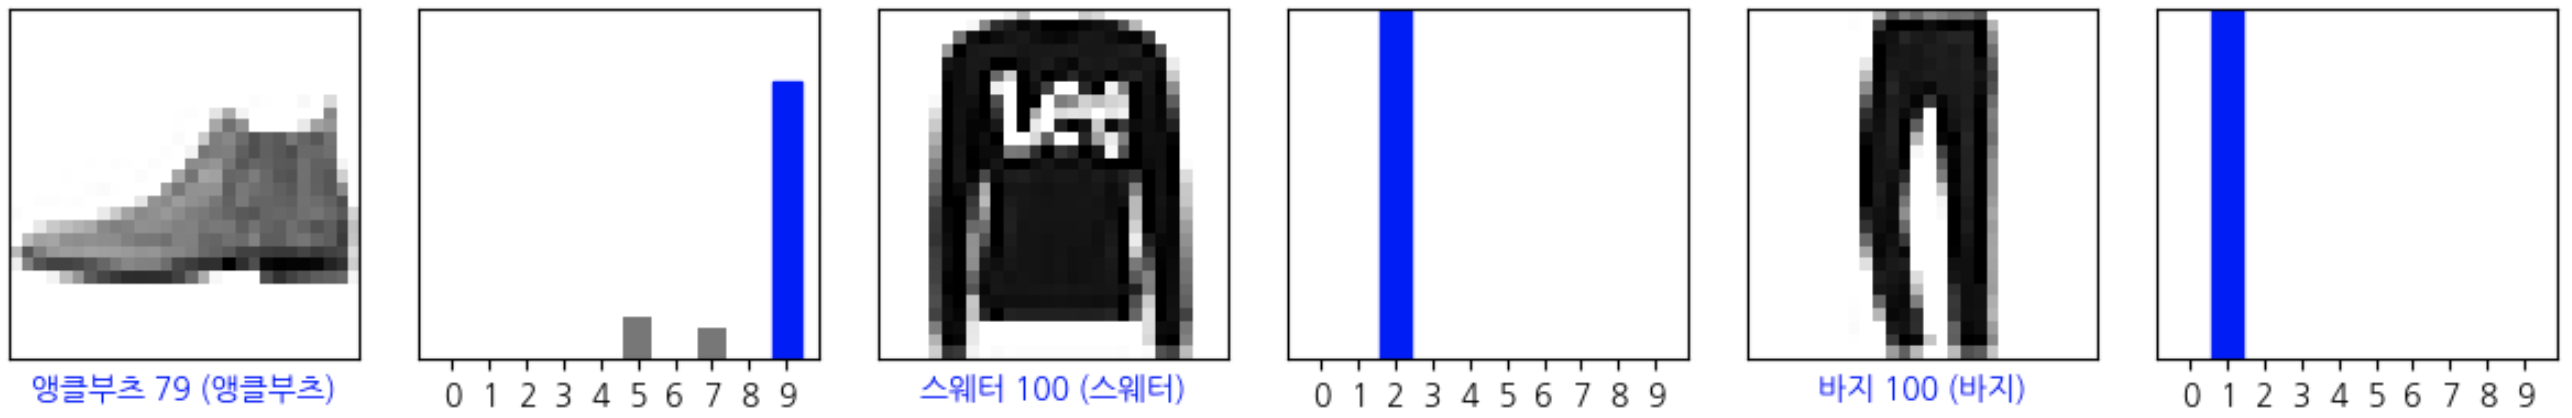

In [95]:
def plot_image_predicted_results(
    predicted_results: np.ndarray, 
    predicted_inputs: np.ndarray,
    true_labels: np.ndarray,
    num_rows: int = 5,
    num_cols: int = 3):
    """값에 해당하는 확률 표시

    Parameters
    ----------
    predicted_results : numpy.ndarray
        (num_of_inputs, n+1) 차원의 배열.
    predicted_inputs : numpy.ndarray
        (num_of_inputs, image_width, image_height) 이미지들.
    true_labels : np.ndarray
        (num_of_inputs, ) 라벨 숫자. n이하여야 한다.
    num_rows : int, default=5
        행의 수.
    num_cols : int, default=3
        열의 수.
    """
    # 그래프 영역 설정
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    
    # 내부 플롯
    for i in range(num_images):
        # 이미지 플롯
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(predicted_results[i], true_labels[i], predicted_inputs[i])
        # 값-확률 플롯
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(predicted_results[i], true_labels[i])
    
    # 그래프 플롯
    plt.tight_layout()
    plt.show()

## 4.2.모델별 예측

### 모델 1

In [96]:
predictions_1 = model_1.predict(test_images)

313/313 [==============================] - 1s 2ms/step


NameError: ignored

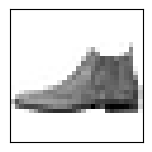

In [97]:
plot_image_predicted_results(
    predictions_1,
    test_images,
    test_labels
)

### 모델 2

In [ ]:
predictions_2 = model_2.predict(test_images)

In [ ]:
plot_image_predicted_results(
    predictions_2,
    test_images,
    test_labels
)

### 모델 2-1

In [ ]:
predictions_2_1 = model_2_1.predict(test_images)

In [ ]:
plot_image_predicted_results(
    predictions_2_1,
    test_images,
    test_labels
)